# Corporate Credit Rating Prediction

Is it possible to predict the credit rating of a company with its financial Ratios?



## The Dataset

- **Liquidity Measurement Ratios**: currentRatio, quickRatio, cashRatio, daysOfSalesOutstanding, daysOfInventoryOutstanding, operatingCycle, daysOfPayablesOutstanding, cashConversionCycle

- **Profitability Indicator Ratios**: grossProfitMargin, operatingProfitMargin, pretaxProfitMargin, netProfitMargin, effectiveTaxRate, returnOnAssets, returnOnEquity, returnOnCapitalEmployed, netIncomePerEBT, ebtPerEbit, ebitPerRevenue

- **Debt Ratios**: debtRatio, debtEquityRatio, longTermDebtToCapitalization, totalDebtToCapitalization, interestCoverage, cashFlowToDebtRatio, companyEquityMultiplier

- **Operating Performance Ratios**: receivablesTurnover, payablesTurnover, inventoryTurnover, fixedAssetTurnover, assetTurnover Cash Flow Indicator Ratios: operatingCashFlowPerShare, freeCashFlowPerShare, cashPerShare, payoutRatio, operatingCashFlowSalesRatio, freeCashFlowOperatingCashFlowRatio, cashFlowCoverageRatios, shortTermCoverageRatios, capitalExpenditureCoverageRatio, dividendPaidAndCapexCoverageRatio, dividendPayoutRatio


#### Import Libraries

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np

## Data Exploration

In [45]:
df_rating = pd.read_csv('data/rating_dataframe.csv')

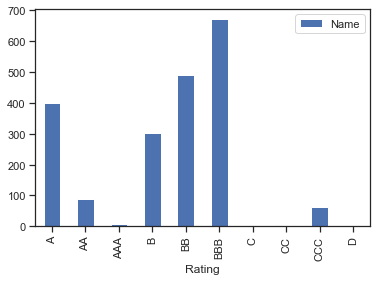

In [46]:
df_rating_summary = df_rating.groupby('Rating').count().reset_index()
df_rating_summary.plot.bar(x='Rating', y = 'Name')

It is better to join all the A's together. 

In [47]:
df_rating.loc[df_rating['Rating'] == 'AA','Rating'] = 'A' 
df_rating.loc[df_rating['Rating'] == 'AAA','Rating'] = 'A' 
df_rating.loc[df_rating['Rating'] == 'CC','Rating'] = 'C' 
df_rating.loc[df_rating['Rating'] == 'CCC','Rating'] = 'C' 
df_rating.loc[df_rating['Rating'] == 'D','Rating'] = 'C'

### EDA

In [48]:
df_rating.describe()

,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,netProfitMargin,pretaxProfitMargin,grossProfitMargin,operatingProfitMargin,returnOnAssets,returnOnCapitalEmployed,...,freeCashFlowOperatingCashFlowRatio,freeCashFlowPerShare,cashPerShare,companyEquityMultiplier,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover,payoutRatio
count,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000,...,2029.000000,2.029000e+03,2.029000e+03,2029.000000,2029.000000,2029.000000,2.029000e+03,2029.000000,2029.000000,2029.000000
mean,3.529607,2.653986,0.667364,333.795606,0.278447,0.431483,0.497968,0.587322,-37.517928,-73.974193,...,0.409550,5.094719e+03,4.227549e+03,3.323579,0.437454,48.287985,6.515123e+03,1.447653,38.002718,-0.085374
std,44.052361,32.944817,3.583943,4447.839583,6.064134,8.984982,0.525307,11.224622,1166.172220,2350.275719,...,3.796488,1.469156e+05,1.224000e+05,87.529866,8.984299,529.118961,1.775290e+05,19.483294,758.923588,40.443603
min,-0.932005,-1.893266,-0.192736,-811.845623,-101.845815,-124.343612,-14.800817,-124.343612,-40213.178290,-87162.162160,...,-120.916010,-4.912742e+03,-1.915035e+01,-2555.419643,-124.343612,-3749.921337,-1.195049e+04,-4.461837,-76.662850,-1735.047170
25%,1.071930,0.602825,0.130630,22.905093,0.021006,0.025649,0.233127,0.044610,0.019176,0.028112,...,0.271478,4.119924e-01,1.566038e+00,2.046822,0.028057,6.238066,2.356735e+00,0.073886,2.205912,0.000000
50%,1.493338,0.985679,0.297493,42.374120,0.064753,0.084965,0.414774,0.107895,0.045608,0.074421,...,0.644529,2.131742e+00,3.686513e+00,2.652456,0.087322,9.274398,4.352584e+00,0.133050,5.759722,0.212845
75%,2.166891,1.453820,0.624906,59.323563,0.114807,0.144763,0.849693,0.176181,0.077468,0.135036,...,0.836949,4.230253e+00,8.086152e+00,3.658331,0.149355,12.911759,7.319759e+00,0.240894,9.480892,0.465593
max,1725.505005,1139.541703,125.917417,115961.637400,198.517873,309.694856,2.702533,410.182214,0.487826,2.439504,...,34.594086,5.753380e+06,4.786803e+06,2562.871795,309.694856,11153.607090,6.439270e+06,688.526591,20314.880400,412.136640


In [49]:
skewValue = df_rating.skew(axis=0)
skewValue

currentRatio                          34.338889
quickRatio                            30.925641
cashRatio                             27.098772
daysOfSalesOutstanding                20.399567
netProfitMargin                       17.619910
pretaxProfitMargin                    22.096334
grossProfitMargin                    -14.203446
operatingProfitMargin                 26.493892
returnOnAssets                       -32.112571
returnOnCapitalEmployed              -33.318531
returnOnEquity                        31.702500
assetTurnover                         26.020347
fixedAssetTurnover                    26.120457
debtEquityRatio                        0.268993
debtRatio                              1.285251
effectiveTaxRate                      32.308742
freeCashFlowOperatingCashFlowRatio   -22.913129
freeCashFlowPerShare                  33.677207
cashPerShare                          34.025861
companyEquityMultiplier                0.269093
ebitPerRevenue                        22

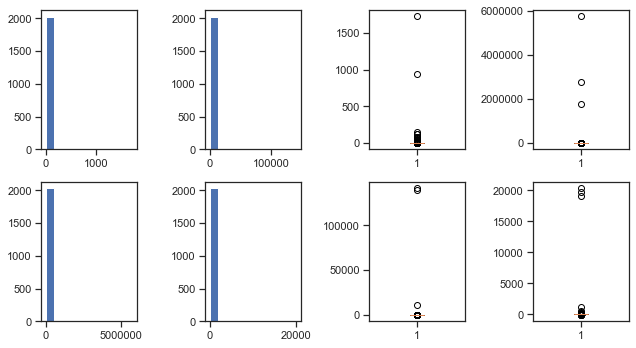

In [50]:
figure, axes = plt.subplots(nrows=2, ncols=4, figsize=(9,5))
axes[0, 0].hist(df_rating.currentRatio)
axes[0, 1].hist(df_rating.returnOnEquity)
axes[1, 0].hist(df_rating.freeCashFlowPerShare)
axes[1, 1].hist(df_rating.payablesTurnover)

axes[0, 2].boxplot(df_rating.currentRatio)
axes[1, 2].boxplot(df_rating.returnOnEquity)
axes[0, 3].boxplot(df_rating.freeCashFlowPerShare)
axes[1, 3].boxplot(df_rating.payablesTurnover)

figure.tight_layout()

#### Log conversion

In [51]:
from sklearn import preprocessing

In [52]:
columns = df_rating.columns[6:]

In [53]:
min_max_scaler = preprocessing.MinMaxScaler()

for c in columns:
    
    float_array = df_rating[[c]].copy().values.astype(float)
    min_max_scaler = preprocessing.MinMaxScaler()
    scaled_array = min_max_scaler.fit_transform(float_array) + 0.1
    df_rating[c + 'log'] = scaled_array
    df_rating[c + 'log'] = df_rating[c + 'log'].apply(np.log)

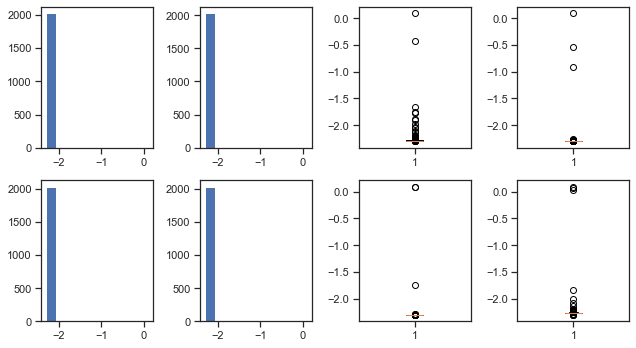

In [54]:
figure, axes = plt.subplots(nrows=2, ncols=4, figsize=(9,5))
axes[0, 0].hist(df_rating.currentRatiolog)
axes[0, 1].hist(df_rating.returnOnEquitylog)
axes[1, 0].hist(df_rating.freeCashFlowPerSharelog)
axes[1, 1].hist(df_rating.payablesTurnoverlog)

axes[0, 2].boxplot(df_rating.currentRatiolog)
axes[1, 2].boxplot(df_rating.returnOnEquitylog)
axes[0, 3].boxplot(df_rating.freeCashFlowPerSharelog)
axes[1, 3].boxplot(df_rating.payablesTurnoverlog)

figure.tight_layout()

# Remove Outlieres - change by mean of Class!!!!!

In [55]:
#------------------------------------------------------------------------------
# accept a dataframe, remove outliers, return cleaned data in a new dataframe
# see http://www.itl.nist.gov/div898/handbook/prc/section1/prc16.htm
#------------------------------------------------------------------------------
from random import sample 

def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    q5 = df_in[col_name].quantile(0.5)
    iqr = q3-q1 #Interquartile range
    fence_low  = q3-1.5*iqr
    fence_high = q1+1.5*iqr
    
    
    df_in.loc[(df_in[col_name] < fence_low),col_name] = sample(list(df_in.loc[(df_in[col_name] > fence_low) & 
                                                                              (df_in[col_name] < q5),
                                                                              col_name]),
                                                               len(df_in.loc[(df_in[col_name] < fence_low),col_name]))
    
    
    df_in.loc[(df_in[col_name] > fence_high),col_name] = sample(list(df_in.loc[(df_in[col_name] > q5) & 
                                                                              (df_in[col_name] < fence_high),
                                                                              col_name]),
                                                                len(df_in.loc[(df_in[col_name] > fence_high),col_name]))

    
    return df_in

In [56]:
for c in df_rating.columns[6:58]:
    df_rating = remove_outlier(df_rating, c)

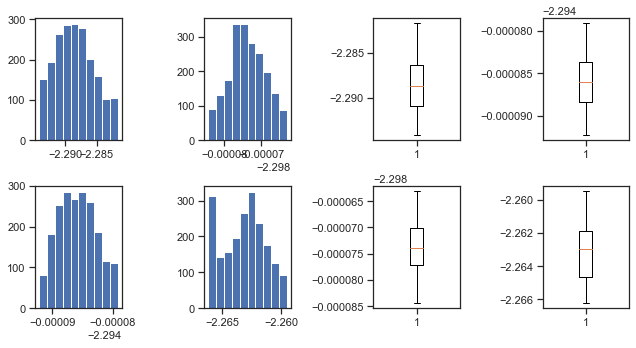

In [57]:
figure, axes = plt.subplots(nrows=2, ncols=4, figsize=(9,5))
axes[0, 0].hist(df_rating.currentRatiolog)
axes[0, 1].hist(df_rating.returnOnEquitylog)
axes[1, 0].hist(df_rating.freeCashFlowPerSharelog)
axes[1, 1].hist(df_rating.payablesTurnoverlog)

axes[0, 2].boxplot(df_rating.currentRatiolog)
axes[1, 2].boxplot(df_rating.returnOnEquitylog)
axes[0, 3].boxplot(df_rating.freeCashFlowPerSharelog)
axes[1, 3].boxplot(df_rating.payablesTurnoverlog)

figure.tight_layout()

# Analyse Relations

In [58]:
df_rating.colors = 'a'
df_rating.loc[df_rating['Rating'] == 'A', 'color'] = 'r'
df_rating.loc[df_rating['Rating'] == 'B', 'color'] = 'g'
df_rating.loc[df_rating['Rating'] == 'BB', 'color'] = 'b'
df_rating.loc[df_rating['Rating'] == 'BBB','color'] = 'y'
df_rating.loc[df_rating['Rating'] == 'C', 'color'] = 'm'

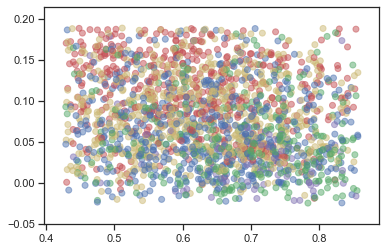

In [59]:
plt.scatter(df_rating.debtRatio, df_rating.returnOnCapitalEmployed, c = df_rating.color, alpha=0.5)
plt.show()

In [60]:
df_rating.groupby('Rating').mean()

,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,netProfitMargin,pretaxProfitMargin,grossProfitMargin,operatingProfitMargin,returnOnAssets,returnOnCapitalEmployed,...,freeCashFlowOperatingCashFlowRatiolog,freeCashFlowPerSharelog,cashPerSharelog,companyEquityMultiplierlog,ebitPerRevenuelog,enterpriseValueMultiplelog,operatingCashFlowPerSharelog,operatingCashFlowSalesRatiolog,payablesTurnoverlog,payoutRatiolog
Rating,,,,,,,,,,,,,,,,,,,,,
A,1.423579,0.905615,0.311615,41.286717,0.085570,0.113636,0.570173,0.133891,0.061023,0.106206,...,-0.125991,-2.294085,-2.302536,-0.511196,-0.949980,-1.043374,-2.284222,-2.237998,-2.263295,-0.096273
B,1.566075,0.992683,0.318410,41.388746,0.041483,0.052611,0.528571,0.081011,0.030695,0.051514,...,-0.126171,-2.294087,-2.302538,-0.511086,-0.950348,-1.043420,-2.284226,-2.238667,-2.263082,-0.096393
BB,1.617949,1.042844,0.367518,41.977108,0.055716,0.070862,0.463743,0.094598,0.038994,0.064523,...,-0.126103,-2.294086,-2.302537,-0.511170,-0.950248,-1.043497,-2.284224,-2.238388,-2.262999,-0.096379
BBB,1.495727,0.955134,0.320138,41.546924,0.071242,0.090552,0.485526,0.113760,0.049947,0.083494,...,-0.126294,-2.294086,-2.302537,-0.511152,-0.950121,-1.043451,-2.284223,-2.238169,-2.263014,-0.096311
C,1.563799,1.003609,0.344268,39.234913,0.038230,0.046069,0.598372,0.077985,0.028677,0.036908,...,-0.126061,-2.294088,-2.302537,-0.511117,-0.950380,-1.043405,-2.284226,-2.238835,-2.263780,-0.096442


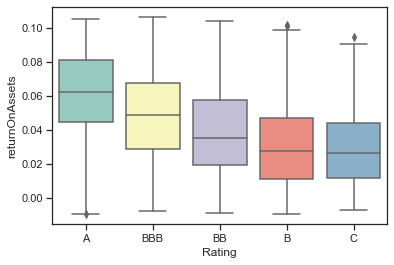

In [109]:
import seaborn as sns

# ax = sns.boxplot(x=df_rating.Rating, y=df_rating.currentRatio,palette="Set3")
# ax = sns.boxplot(x=df_rating.Rating, y=df_rating.quickRatio,palette="Set3")
# ax = sns.boxplot(x=df_rating.Rating, y=df_rating.daysOfSalesOutstanding,palette="Set3")
ax = sns.boxplot(x=df_rating.Rating, y=df_rating.returnOnAssets,palette="Set3")

# Boxplot

In [100]:
df_plot = df_rating.copy()
df_plot = df_plot.iloc[:,0:32]
df_plot.drop(df_plot.columns[1:6], axis = 1, inplace = True)

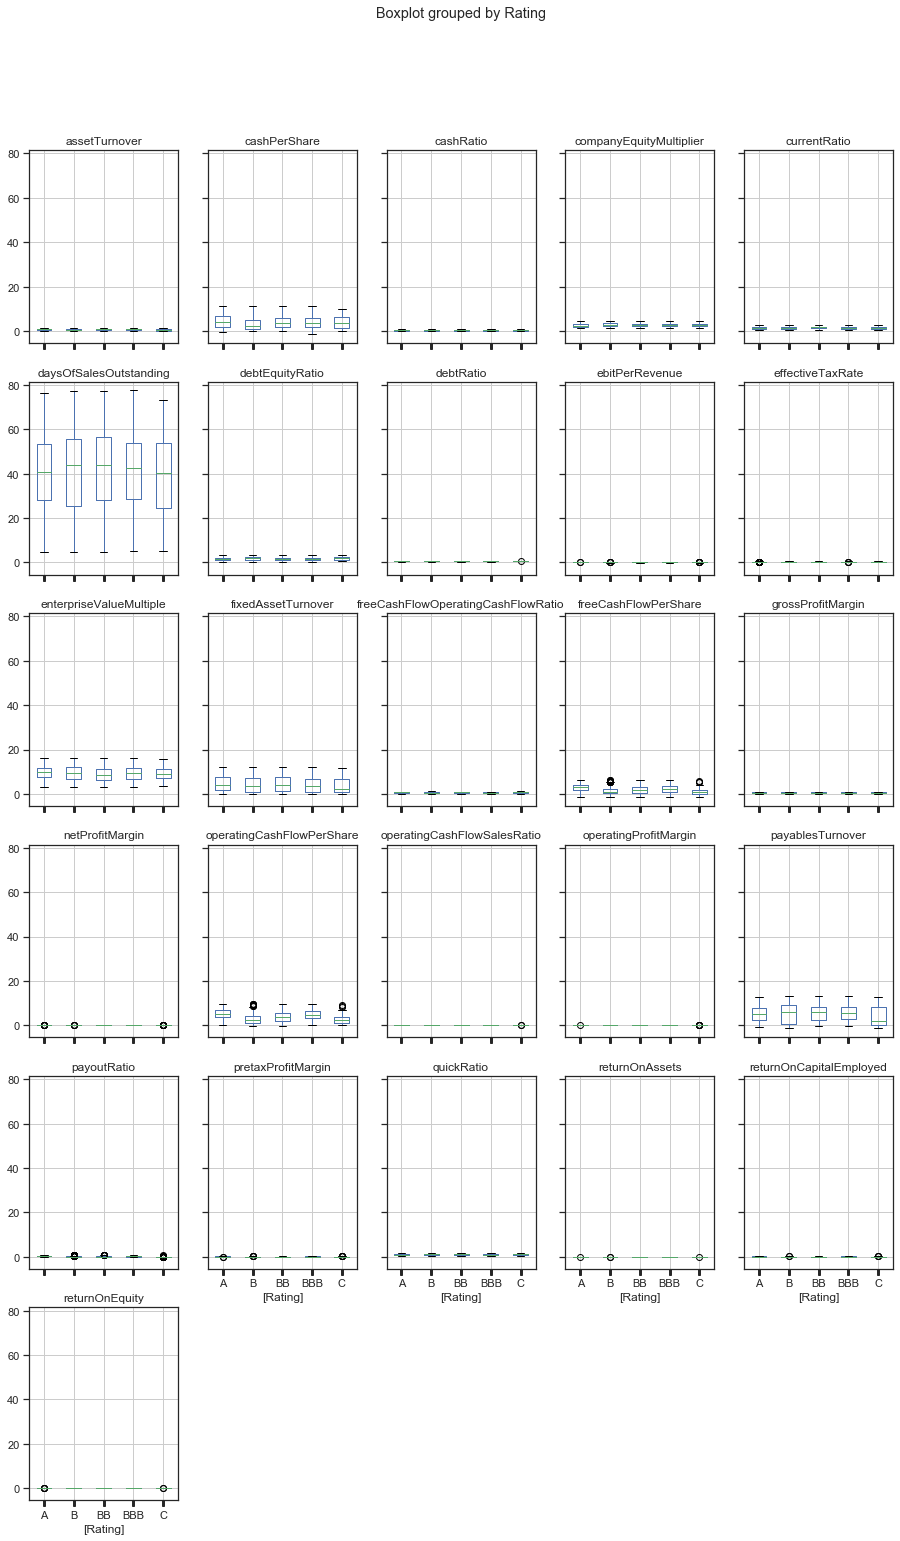

In [101]:
boxplot = df_plot.boxplot(by='Rating', figsize=(15,25))

# PCA

In [496]:
df_rating.columns[32]

'currentRatiolog'

In [497]:
from sklearn.preprocessing import StandardScaler

In [498]:
features = df_rating.columns[6:32]

# Separating out the features
x = df_rating.loc[:, features].values
# Separating out the target
y = df_rating.loc[:,['Rating']].values
# Standardizing the features
# x = StandardScaler().fit_transform(x)

In [499]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['pca1', 'pca2','pca3','pca4','pca5'])

In [500]:
finalDf = pd.concat([principalDf, df_rating[['Rating']]], axis = 1)

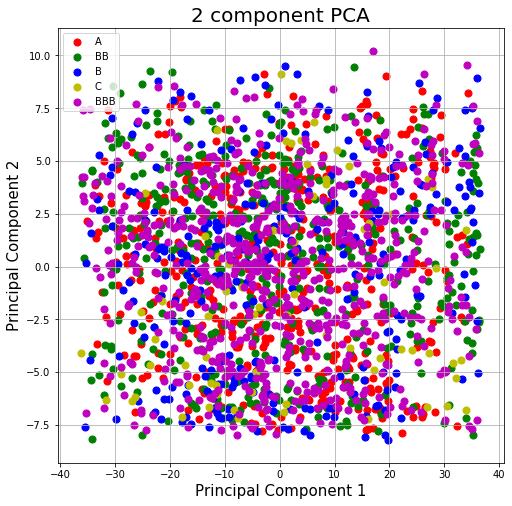

In [501]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = list(set(df_rating.Rating))
colors = ['r', 'g', 'b','y', 'm']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Rating'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'pca1'], 
               finalDf.loc[indicesToKeep, 'pca2'], 
               c = color, 
               s = 50)

ax.legend(targets)
ax.grid()

In [502]:
sum(pca.explained_variance_ratio_)

0.9768313669633458

In [503]:
# Load libraries
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

#### Train and Test

In [629]:
import numpy as np
from sklearn.model_selection import train_test_split
X, y = finalDf.iloc[:,:5], finalDf.iloc[:,5]

In [630]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression

In [506]:
from sklearn.linear_model import LogisticRegression
# X_train, y_test = load_iris(return_X_y=True)
clf = LogisticRegression(random_state=0 , multi_class='multinomial', solver='newton-cg')
model = clf.fit(X_train, y_train)

In [507]:
y_pred= model.predict(X_test)

In [508]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.3694581280788177


# Random Forest

In [584]:
import numpy as np
from sklearn.model_selection import train_test_split
X, y = df_rating.iloc[:,32:58], df_rating.iloc[:,0]

In [585]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [586]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [587]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5246305418719212


### LDA

In [588]:
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
clf.fit(X_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [589]:
y_pred=clf.predict(X_test)

In [590]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.45566502463054187


# QDA

In [591]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


clf = QuadraticDiscriminantAnalysis()
clf.fit(X, y)
y_pred=clf.predict(X_test)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [592]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6083743842364532


# KNN

In [593]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=15)
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)

In [594]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.312807881773399


# New Test Regression

#### Train and Test

In [544]:
import numpy as np
from sklearn.model_selection import train_test_split
X, y = df_rating.iloc[:,32:49], df_rating.iloc[:,0]

In [545]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [546]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
clf = QuadraticDiscriminantAnalysis()
clf.fit(X, y)
y_pred=clf.predict(X_test)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [547]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5123152709359606


In [548]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)

In [549]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.29310344827586204


# XGBOOST

In [634]:
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

In [635]:
import numpy as np
from sklearn.model_selection import train_test_split
X, y = df_rating.iloc[:,6:32], df_rating.iloc[:,0]

In [636]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [637]:
clf = GradientBoostingClassifier(random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
# print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
clf.score(X_test, y_test)

0.45566502463054187

# Support Vector Machine

In [622]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [631]:
from sklearn import svm
clf = svm.SVC(kernel='rbf', gamma= 2, C = 5)
clf.fit(X_train, y_train)

SVC(C=5, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=2, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [632]:
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.3399014778325123
